In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb
from IPython.display import display
import os
import seaborn as sns
import statsmodels.formula.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.model_selection import train_test_split
import sklearn
from math import sqrt
import glob

In [2]:
##Remote sensing data:

# df_rs = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/Streamlined/df_remotedata.csv')
##Above: needs to be merged with biomass data (df_sum)
# df1 = pd.merge(df_rs, df_sum, how = 'right')

dfv = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Virginia/Streamlined/va_yr.csv')
# dfw = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Virginia/Streamlined/va_octnov.csv') ##BAD
dfx = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Virginia/Streamlined/va_augoct.csv')
dfy = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Virginia/Streamlined/va_sepoct.csv')
# dfz = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Virginia/Streamlined/va_oct.csv') ##BAD

dfv.rename(
    columns={
        'ndvi':'ndvi_yr','savi':'savi_yr','wdrvi5':'wdrvi5_yr','nd_r_g':'nd_r_g_yr', 'nd_g_b':'nd_g_b_yr',
        'nd_swir2_nir':'nd_swir2_nir_yr', 'nd_swir2_r':'nd_swir2_r_yr'
    }, inplace=True
)

# dfw.rename(
#     columns={
#         'ndvi':'ndvi_octnov','savi':'savi_octnov','wdrvi5':'wdrvi5_octnov','nd_r_g':'nd_r_g_octnov', 'nd_g_b':'nd_g_b_octnov',
#         'nd_swir2_nir':'nd_swir2_nir_octnov', 'nd_swir2_r':'nd_swir2_r_octnov'
#     }, inplace=True
# )

dfx.rename(
    columns={
        'ndvi':'ndvi_augoct','savi':'savi_augoct','wdrvi5':'wdrvi5_augoct','nd_r_g':'nd_r_g_augoct', 'nd_g_b':'nd_g_b_augoct',
        'nd_swir2_nir':'nd_swir2_nir_augoct', 'nd_swir2_r':'nd_swir2_r_augoct'
    }, inplace=True
)

dfy.rename(
    columns={
        'ndvi':'ndvi_sepoct','savi':'savi_sepoct','wdrvi5':'wdrvi5_sepoct','nd_r_g':'nd_r_g_sepoct', 'nd_g_b':'nd_g_b_sepoct',
        'nd_swir2_nir':'nd_swir2_nir_sepoct', 'nd_swir2_r':'nd_swir2_r_sepoct'
    }, inplace=True
)


# df9 = pd.merge(dfw, dfv, on = ['Year', 'Code', 'locationID', 'Replicate', 'Latitude', 'Longitude', 'liveMass'], how = 'left')
# df8 = pd.merge(dfx, dfy, on = ['Year', 'Code', 'locationID', 'Replicate', 'Latitude', 'Longitude', 'liveMass'], how = 'left')
# df0 = pd.merge(df9, df8, on = ['Year', 'Code', 'locationID', 'Replicate', 'Latitude', 'Longitude', 'liveMass'], how = 'left')
# df1 = pd.merge(dfz, df0, on = ['Year', 'Code', 'locationID', 'Replicate', 'Latitude', 'Longitude', 'liveMass'], how = 'left')

# df0 = pd.merge(dfx, dfy, on = ['Latitude', 'Longitude', 'Plant_Biomass', 'Year'], how = 'left')
# df1 = pd.merge(dfz, df0, on = ['Latitude', 'Longitude', 'Plant_Biomass', 'Year'], how = 'left')

df0 = pd.merge(dfv, dfx, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

df1 = pd.merge(df0, dfy, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')


df1['ident'] = df1['ndvi_yr'] * df1['ndvi_augoct'] * df1['ndvi_sepoct']

display(df1)

,Year,locationID,Latitude,liveMass,Longitude,Transect,N,B2,B3,B4,...,nd_swir2_nir_augoct,nd_swir2_r_augoct,ndvi_sepoct,savi_sepoct,wdrvi5_sepoct,nd_r_g_sepoct,nd_g_b_sepoct,nd_swir2_nir_sepoct,nd_swir2_r_sepoct,ident
0,1999,1,37.167147,46.72,-75.940768,A,2,0.052050,0.054175,0.086750,...,-0.312200,-0.066493,0.250916,0.067466,-0.089940,-0.020359,0.132979,-0.312200,-0.066493,0.014553
1,1999,1,37.174764,399.68,-75.942417,A,2,0.053340,0.054900,0.098160,...,-0.315115,-0.009877,0.306192,0.087636,-0.030227,0.036755,0.151515,-0.315115,-0.009877,0.026498
2,1999,1,37.180976,441.68,-75.940766,A,2,0.057950,0.057875,0.115750,...,-0.417105,-0.003375,0.414314,0.145102,0.093956,-0.029380,0.183980,-0.417105,-0.003375,0.057219
3,1999,1,37.287699,669.60,-75.929487,A,2,0.053940,0.054620,0.150000,...,-0.496251,0.176107,0.618321,0.273957,0.358974,-0.017199,0.269939,-0.496251,0.176107,0.178212
4,1999,1,37.345970,875.52,-75.901065,A,2,0.075975,0.079763,0.149487,...,-0.330456,0.108817,0.424025,0.178325,0.105620,0.035055,0.163515,-0.330456,0.108817,0.054684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,2017,3,37.287875,96.08,-75.929008,B,2,0.036187,0.054947,0.049860,...,-0.549450,0.252567,0.686454,0.372871,0.457896,-0.044039,0.186089,-0.488264,0.298107,0.324417
1004,2017,3,37.167768,26.56,-75.944280,C,2,0.053407,0.070279,0.076121,...,-0.272668,0.194727,0.422785,0.215164,0.104126,0.051064,0.134860,-0.216045,0.227521,0.080676
1005,2017,3,37.449973,279.36,-75.671952,C,1,0.038233,0.049422,0.048778,...,-0.508682,0.234450,0.663949,0.349052,0.424582,-0.077966,0.155104,-0.508682,0.234450,0.261523
1006,2018,1,37.396051,255.04,-75.876056,C,1,0.050643,0.067657,0.072257,...,-0.377351,0.220411,0.551863,0.309689,0.267790,-0.006429,0.155593,-0.377351,0.220411,0.149712


In [12]:
import glob

path = r'C:/Users/arj26323/Documents/Xin data/Virginia' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)


df_flooding = df.groupby(['Latitude', 'Longitude', 'Year']).apply(
    lambda g: (g['flats'] >= 0.2).mean()).reset_index(name='Percent_flooding'
                                                     )
# df1 = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Virginia/va_testx.csv')
# df1 = df1.merge(df_flooding, on=['Latitude', 'Longitude', 'Year'], how='inner')
# df1

In [27]:
import os

df1 = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Virginia/va_testzzz.csv')
# df1 = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Virginia/va_testx.csv')

# df1 = df1.merge(df_flooding, on=['Latitude', 'Longitude', 'Year'], how='inner')
df1

,Latitude,Longitude,N_x,QA_PIXEL,QA_RADSAT,SR_ATMOS_OPACITY,SR_B1,SR_B2,SR_B3,SR_B4,...,Red_band_MarMay,NIR_band_MarMay,SWIR1_band_MarMay,SWIR2_band_MarMay,savi_MarMay,wdrvi5_MarMay,nd_r_g_MarMay,nd_g_b_MarMay,nd_swir2_nir_MarMay,nd_swir2_r_MarMay
0,37.167424,-75.941716,3.0,5440.0,0.0,225.500000,0.033557,0.046812,0.042247,0.105429,...,0.050122,0.095662,0.122877,0.078318,0.105779,-0.023387,-0.008702,0.115034,-0.099686,0.219532
1,37.180976,-75.940766,4.0,5440.0,0.0,226.000000,0.039319,0.063656,0.059476,0.127869,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,37.181789,-75.942028,7.0,5440.0,0.0,227.000000,0.031921,0.044379,0.043801,0.105429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37.346218,-75.901132,2.0,5440.0,0.0,262.333333,0.045025,0.066530,0.067731,0.158747,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,37.416357,-75.862222,4.0,5440.0,0.0,203.500000,0.036761,0.049934,0.048531,0.109471,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,37.450439,-75.672455,4.0,21824.0,0.0,NaN,0.039244,0.041227,0.059120,0.050879,...,0.055095,0.246971,0.177364,0.092861,0.358842,0.382971,-0.056512,0.183651,-0.453488,0.255256
488,37.450771,-75.672169,2.0,21824.0,0.0,NaN,0.038336,0.038908,0.054519,0.042159,...,0.043792,0.283349,0.162180,0.077315,0.434431,0.527763,-0.134711,0.182584,-0.571265,0.276801
489,37.451099,-75.673269,4.0,21824.0,0.0,NaN,0.032994,0.033626,0.042385,0.039724,...,0.044200,0.147737,0.127118,0.072739,0.224451,0.251284,-0.020716,0.141526,-0.340162,0.244054
490,37.396051,-75.876056,2.0,21824.0,0.0,NaN,0.045575,0.049792,0.072800,0.064458,...,0.072525,0.215786,0.216240,0.134716,0.272598,0.196034,0.004954,0.168212,-0.231296,0.300091


In [14]:
##MARMAY is actually MARJUN for VIRGINIA data ONLY

In [28]:
##Modeling
df1.rename(columns={'elevation':'Elevation'}, inplace=True)
# df1 = df1[df1['ident'].notna()] ##remove rows with NaN for columns used in the model 
df1 = df1[df1['prcp'].notna()] ##CAREFUL; added 7/11/22
# df1 = df1[(df1['flats'] < 0.1)] ##TIDAL FILTERING STEP!

#Adding evi
df1['evi'] = ((df1['NIR_band']-df1['Red_band'])*2.5)/(df1['NIR_band']+6*df1['Red_band']+7.5*df1['Blue_band']+1)
df1['evi_peak'] = ((df1['NIR_band_peak']-df1['Red_band_peak'])*2.5)/(df1['NIR_band_peak']+6*df1['Red_band_peak']+\
                                                                     7.5*df1['Blue_band_peak']+1)
df1['evi_MarMay'] = ((df1['NIR_band_MarMay']-df1['Red_band_MarMay'])*2.5)/(df1['NIR_band_MarMay']+6*df1['Red_band_MarMay']+\
                                                                           7.5*df1['Blue_band_MarMay']+1)
df1['evi_year'] = ((df1['NIR_band_year']-df1['Red_band_year'])*2.5)/(df1['NIR_band_year']+6*df1['Red_band_year']+\
                                                                     7.5*df1['Blue_band_year']+1)

from sklearn.model_selection import train_test_split
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from datetime import datetime

# df1['Date'] = pd.to_datetime(df1.Date, format='%m/%d/%Y')
# df1['DOY'] = df1['Date'].dt.strftime('%j') ##Add day of year (DOY) to dataset
# df1['DOY'] = df1['Date'].dt.strftime('%j').astype('float') ##The astype('float') is only for the regression - not for ML 

xargs=df1[
    [
#         'Percent_flooding',
        
        'flats',
        
        'ndvi', 'nd_swir2_r', 'nd_swir2_nir', 'nd_g_b','wdrvi5', 'savi', 'evi',
        'Blue_band','Green_band','Red_band','NIR_band','SWIR1_band','SWIR2_band',
        
        'ndvi_MarMay', 'nd_swir2_r_MarMay', 'nd_swir2_nir_MarMay', 'nd_g_b_MarMay','wdrvi5_MarMay', 'savi_MarMay', 'evi_MarMay',
        'Blue_band_MarMay','Green_band_MarMay','Red_band_MarMay','NIR_band_MarMay','SWIR1_band_MarMay','SWIR2_band_MarMay',
        
        'ndvi_year', 'nd_swir2_r_year', 'nd_swir2_nir_year', 'nd_g_b_year','wdrvi5_year', 'savi_year', 'evi_year',
        'Blue_band_year','Green_band_year','Red_band_year','NIR_band_year','SWIR1_band_year','SWIR2_band_year',
        
        'ndvi_peak', 'nd_swir2_r_peak', 'nd_swir2_nir_peak', 'nd_g_b_peak','wdrvi5_peak', 'savi_peak', 'evi_peak',
        'Blue_band_peak','Green_band_peak','Red_band_peak','NIR_band_peak','SWIR1_band_peak','SWIR2_band_peak',

        'Elevation', 
        
        'dayl_daymMarMay', 'prcp_daymMarMay', 'srad_daymMarMay', 'swe_daymMarMay', 'tmax_daymMarMay', 'tmin_daymMarMay',
        'vp_daymMarMay',
        
        'dayl_peak', 'prcp_peak', 'srad_peak', 'swe_peak', 'tmax_peak', 'tmin_peak',
        'vp_peak',        
        
        'dayl_Min', 'prcp_Min', 'srad_Min', 'swe_Min', 'tmax_Min', 'tmin_Min',
        'vp_Min',
        
        'dayl_Max', 'prcp_Max', 'srad_Max', 'swe_Max', 'tmax_Max', 'tmin_Max',
        'vp_Max',
        
        'dayl_daymMayOct', 'prcp_daymMayOct', 'srad_daymMayOct', 'swe_daymMayOct', 'tmax_daymMayOct', 'tmin_daymMayOct',
        'vp_daymMayOct',
        
        'dayl_rolling', 'prcp_rolling', 'srad_rolling', 'swe_rolling', 'tmax_rolling', 'tmin_rolling',
        'vp_rolling',

        
#         'Elevation', 'tmax', 'tmin', 'ndvi_augoct',
#         'savi_augoct','wdrvi5_augoct','nd_r_g_augoct','nd_g_b_augoct','nd_swir2_nir_augoct', 
#         'nd_swir2_r_augoct','ndvi_sepoct',
#         'savi_sepoct','wdrvi5_sepoct','nd_r_g_sepoct','nd_g_b_sepoct','nd_swir2_nir_sepoct', 
#         'nd_swir2_r_sepoct','ndvi_yr',
#         'savi_yr','wdrvi5_yr','nd_r_g_yr','nd_g_b_yr','nd_swir2_nir_yr', 'nd_swir2_r_yr'
    ]
]

yargs=df1['liveMass'] 

##NEED SEASONAL DAYMET DATA
#removed: 'nd_r_g','dayl','sn_prcp', 'sn_dayl', 'sn_srad', 'sn_vp', 'vp', 'srad', 'prcp'

##Include lag variables (e.g. lag ndvi), precip, temp, more

##ELEVATION NEEDS TO BE TRIPLE-CHECKED AT EACH PLOT TO MAKE SURE VALUES CORRESPOND

size_x = 0.2
seed = 8
xargs_train, xargs_test, yargs_train, yargs_test = train_test_split(xargs, yargs, test_size=size_x, random_state = seed) 
## 80% training and 20% test

In [29]:
#Pipeline:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn import metrics
pipe = Pipeline([('scaler', StandardScaler()), ('forest', RandomForestRegressor(n_estimators=100, random_state=seed))])
pipe.fit(xargs_train, yargs_train)
y_pred=pipe.predict(xargs_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(yargs_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(yargs_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yargs_test, y_pred)))
r_square = metrics.r2_score(yargs_test, y_pred)
print("The r squared is: " + str(r_square))
print(r_square)
print('testing r2 is: ' + str(pipe.score(xargs_test, yargs_test)))
print('training r2 is: ' + str(pipe.score(xargs_train, yargs_train)))
print('NRMSE is: ' + str(np.sqrt(metrics.mean_squared_error(yargs_test, y_pred))/np.ptp(yargs_test)))

# Mean
print('MEAN BASELINE:')
y_pred_mean = [np.mean(yargs_train)] * len(yargs_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(yargs_test, y_pred_mean))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yargs_test, y_pred_mean)))

# NDVI
print('NDVI BASELINE: unfinished')

Mean Absolute Error: 152.18357502095512
Mean Squared Error: 49262.0664098015
Root Mean Squared Error: 221.95059452455067
The r squared is: 0.1498061222520155
0.1498061222520155
testing r2 is: 0.1498061222520155
training r2 is: 0.9049908148076313
NRMSE is: 0.16663624759090753
MEAN BASELINE:
Mean Absolute Error: 189.70601982698145
Root Mean Squared Error: 248.7093517884294
NDVI BASELINE: unfinished


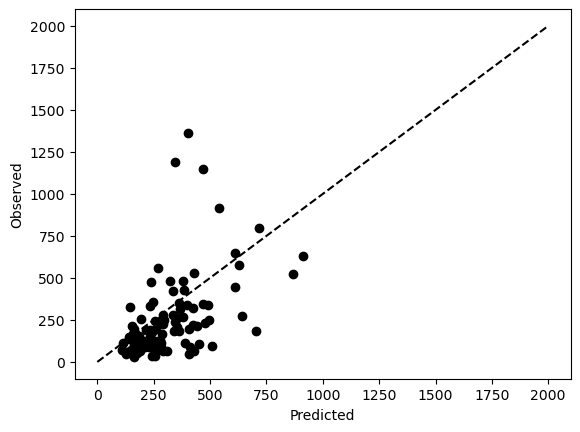

test data correlation coefficient is: 0.4904044034618151
train data correlation coefficient is: 0.9670589977126441


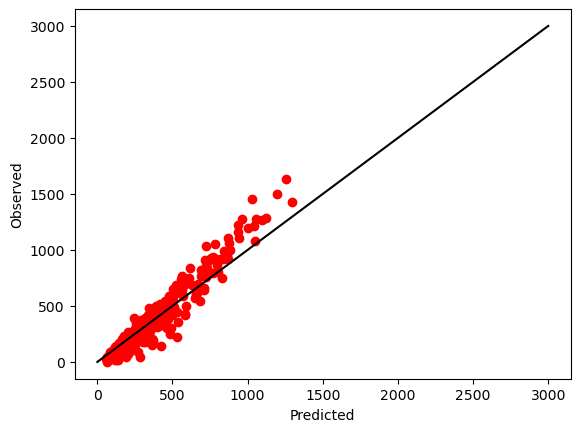

In [30]:
plt.scatter(y_pred, yargs_test, color = 'black') ##label axes - x,y in order?
# plt.plot(X_val, regressor.predict(X_val), color = 'red')
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.plot([0, 2000], [0, 2000], 'k--')
plt.show()

print('test data correlation coefficient is: ' + str(np.corrcoef(yargs_test, y_pred)[0, 1]))

train_pred = pipe.predict(xargs_train) ##Not sure if this is the right thing to do here
plt.scatter(train_pred, yargs_train, color = 'red')
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.plot([0, 3000], [0, 3000], 'k-')
plt.show

print('train data correlation coefficient is: ' + str(np.corrcoef(train_pred, yargs_train)[0, 1]))

In [31]:
##k-fold cross validation; random forest

predictors = xargs

targets = df1['liveMass'] 

from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import KFold, cross_validate

X, y = predictors, targets
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True)

model = pipe
scoring=('r2', 'neg_root_mean_squared_error')

cv_results = cross_validate(model, X, y, cv=kf, scoring=scoring, return_train_score=False)
cv_results

##from: https://stackoverflow.com/questions/55270431/how-to-correctly-perform-cross-validation-in-scikit-learn

{'fit_time': array([1.80733395, 1.76996064, 1.73449183, 1.765203  , 1.73397756]),
 'score_time': array([0.00698137, 0.        , 0.01562166, 0.        , 0.01562214]),
 'test_r2': array([0.52028229, 0.3436491 , 0.20046754, 0.22516215, 0.23274262]),
 'test_neg_root_mean_squared_error': array([-190.18690558, -264.57487271, -200.23549449, -294.52212693,
        -225.25567703])}

In [32]:
#Feature importance and average RMSE
x = pd.DataFrame(cv_results)
print(x['test_r2'].mean())
print(x['test_neg_root_mean_squared_error'].mean())
print('NRSME is: ' + str(x['test_neg_root_mean_squared_error'].mean()/np.ptp(yargs_test)))

0.3044607400126154
-234.9550153473649
NRSME is: -0.17639971721642875


In [12]:
##Feature selection
import time
import numpy as np

feature_importances = pipe.named_steps['forest'].feature_importances_
feature_importance_df = pd.DataFrame({'Feature': xargs.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df.head(20))  # Keep the top 20 most important features

# pd.set_option('display.max_rows', None)
# print(feature_importance_df)

              Feature  Importance
0    Percent_flooding    0.188354
41          Elevation    0.150786
31        nd_g_b_peak    0.062130
24      Red_band_year    0.048270
4        nd_swir2_nir    0.039346
18        nd_g_b_year    0.031721
22     Blue_band_year    0.027942
67           tmax_Max    0.024551
5              nd_g_b    0.022476
9           Blue_band    0.017968
20          savi_year    0.017338
23    Green_band_year    0.016601
17  nd_swir2_nir_year    0.015831
48      vp_daymMarMay    0.014871
37      Red_band_peak    0.014068
2                ndvi    0.013322
28          ndvi_peak    0.012846
1               flats    0.012108
47    tmin_daymMarMay    0.012042
10         Green_band    0.011811
